<h1> <strong> EXPLORATION DATABASE ENIAC </strong> <h1>

<h> <strong> ORDERS DATAFRAME <strong>  </h> 

In [ ]:
import pandas as pd

In [2]:
orders = pd.read_csv("orders.csv")
print(orders)

        order_id         created_date  total_paid            state
0         241319  2017-01-02 13:35:40       44.99        Cancelled
1         241423  2017-11-06 13:10:02      136.15        Completed
2         242832  2017-12-31 17:40:03       15.76        Completed
3         243330  2017-02-16 10:59:38       84.98        Completed
4         243784  2017-11-24 13:35:19      157.86        Cancelled
...          ...                  ...         ...              ...
226904    527397  2018-03-14 13:56:38       42.99      Place Order
226905    527398  2018-03-14 13:57:25       42.99  Shopping Basket
226906    527399  2018-03-14 13:57:34      141.58  Shopping Basket
226907    527400  2018-03-14 13:57:41       19.98  Shopping Basket
226908    527401  2018-03-14 13:58:36       18.98      Place Order

[226909 rows x 4 columns]


<p> <strong> 1. Initial exploration about orders df </strong>  </p>

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


<p> <strong> Comments: </strong> <br>
 created_date columns in an object(string) and not datetime format   </p>

<p> <strong> 2. Visualize first 5 and last five rows on orders df </strong>  </p>

In [4]:
orders.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


In [5]:
orders.tail()

,order_id,created_date,total_paid,state
226904,527397,2018-03-14 13:56:38,42.99,Place Order
226905,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226906,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226907,527400,2018-03-14 13:57:41,19.98,Shopping Basket
226908,527401,2018-03-14 13:58:36,18.98,Place Order


In [98]:
orders.duplicated().sum()

0

<p> <strong> 3.Some basic numerical aggregations </strong>  </p>

In [6]:
orders.describe()

,order_id,total_paid
count,226909.000000,226904.000000
mean,413296.482480,569.225818
std,65919.250331,1761.778002
min,241319.000000,0.000000
25%,356263.000000,34.190000
50%,413040.000000,112.990000
75%,470553.000000,525.980000
max,527401.000000,214747.530000


<p> <strong> 4.Highlight which columns contain missing data  </strong>  </p>

In [7]:
orders.isna().any()

order_id        False
created_date    False
total_paid       True
state           False
dtype: bool

In [10]:
orders.shape

(226909, 4)

In [11]:
orders.columns

Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')

<p> <strong> Comment: </strong> <br> Since we have detected a column with missing values, let's see ho many of them are missing  </p>

In [15]:
orders.total_paid.isna().sum()

5

<p> <strong> 5.Summarise columns.  </strong>  </p>

In [18]:
orders.value_counts()

order_id  created_date         total_paid  state          
241319    2017-01-02 13:35:40  44.99       Cancelled          1
451480    2017-11-29 07:56:18  2466.56     Shopping Basket    1
451469    2017-12-01 19:56:34  24.98       Completed          1
451470    2017-11-29 07:53:58  145.98      Pending            1
451471    2017-11-29 07:48:15  3202.57     Shopping Basket    1
                                                             ..
375183    2017-07-10 09:30:12  394.99      Place Order        1
375184    2017-07-10 09:32:05  29.53       Shopping Basket    1
375185    2017-07-10 09:34:55  94.99       Shopping Basket    1
375186    2017-07-10 09:40:47  14.99       Shopping Basket    1
527401    2018-03-14 13:58:36  18.98       Place Order        1
Length: 226904, dtype: int64

<p> <strong> 6.Visualize numerical  columns.  </strong>  </p>

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'total_paid'}>]], dtype=object)

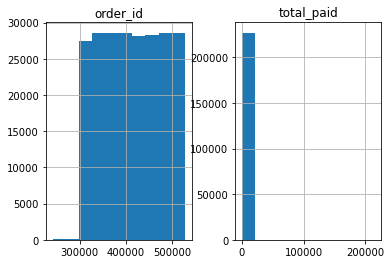

In [19]:
orders.hist()

<p> <strong> 7.Some insights.  </strong>  </p>

In [101]:
orders.groupby('state').order_id.count()

state
Cancelled            7233
Completed           46605
Pending             14379
Place Order         40883
Shopping Basket    117809
Name: order_id, dtype: int64

<h> <strong> ORDERLINES DATAFRAME <strong>  </h> 

In [38]:
import pandas as pd

orderlines = pd.read_csv("orderlines.csv")
print(orderlines)

             id  id_order  product_id  product_quantity      sku unit_price  \
0       1119109    299539           0                 1  OTT0133      18.99   
1       1119110    299540           0                 1  LGE0043     399.00   
2       1119111    299541           0                 1  PAR0071     474.05   
3       1119112    299542           0                 1  WDT0315      68.39   
4       1119113    299543           0                 1  JBL0104      23.74   
...         ...       ...         ...               ...      ...        ...   
293978  1650199    527398           0                 1  JBL0122      42.99   
293979  1650200    527399           0                 1  PAC0653     141.58   
293980  1650201    527400           0                 2  APP0698       9.99   
293981  1650202    527388           0                 1  BEZ0204      19.99   
293982  1650203    527401           0                 1  APP0927      13.99   

                       date  
0       2017-01-01 00

<p> <strong> 1. Initial exploration  </strong>  </p>

In [39]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


<p> <strong> Comments: </strong> <br>
 date and unit_price columns in an object(string) and not datetime format   </p>

<p> <strong> 2. Visualize first five and last five rows </strong>  </p>

In [40]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [41]:
orderlines.tail()

,id,id_order,product_id,product_quantity,sku,unit_price,date
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01
293982,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36


In [97]:
orderlines.duplicated().sum()

0

<p> <strong> 3.Some basic numerical aggregations </strong>  </p>

In [48]:
orderlines.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


<p> <strong> 4.Highlight which columns contain missing data  </strong>  </p>

In [49]:
orderlines.isna().any()

id                  False
id_order            False
product_id          False
product_quantity    False
sku                 False
unit_price          False
date                False
dtype: bool

In [50]:
orderlines.shape

(293983, 7)

In [51]:
orderlines.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date'],
      dtype='object')

<p> <strong> 5.Summarise columns.  </strong>  </p>

In [52]:
orderlines.value_counts()

id       id_order  product_id  product_quantity  sku      unit_price  date               
1119109  299539    0           1                 OTT0133  18.99       2017-01-01 00:07:19    1
1487226  459168    0           1                 MMW0016  22.99       2017-12-10 20:16:55    1
1487233  459170    0           1                 APP2274  2.247.59    2017-12-10 20:17:11    1
1487232  459169    0           1                 APP0663  199.00      2017-12-10 20:17:03    1
1487231  459169    0           1                 MMW0016  22.99       2017-12-10 20:17:03    1
                                                                                            ..
1306380  383925    0           1                 SPE0164  28.92       2017-07-30 11:56:39    1
1306382  383926    0           1                 APP2446  389.00      2017-07-30 12:00:53    1
1306387  382323    0           1                 LAC0227  286.79      2017-07-30 12:07:03    1
1306388  382323    0           1                 LAC023

<p> <strong> 6.Visualize numerical  columns.  </strong>  </p>

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'id_order'}>],
       [<AxesSubplot:title={'center':'product_id'}>,
        <AxesSubplot:title={'center':'product_quantity'}>]], dtype=object)

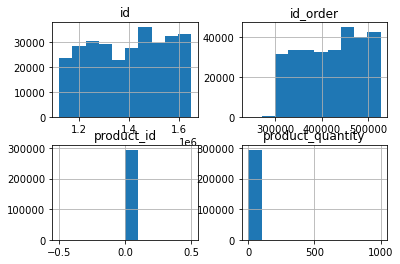

In [57]:
orderlines.hist()

<p> <strong> 7.Some insights.  </strong>  </p>

In [66]:
orderlines.groupby('sku').id_order.count().sort_values(ascending=False)

sku
MIC0036      6282
APP1216      5627
APP0662      5445
APP1190      5039
APP0663      3942
             ... 
BOO0086         1
BOS0017         1
APP2508-A       1
APP0695-A       1
DLK0059         1
Name: id_order, Length: 7951, dtype: int64

In [67]:
orderlines.date.mode()

0    2018-03-05 10:36:05
dtype: object

In [68]:
orderlines.sku.mode()

0    MIC0036
dtype: object

<h> <strong> PRODUCTS DATAFRAME <strong>  </h> 

In [71]:
import pandas as pd

products = pd.read_csv("products.csv")
print(products)

           sku                                           name  \
0      RAI0007              Silver Rain Design mStand Support   
1      APP0023              Apple Mac Keyboard Keypad Spanish   
2      APP0025               Mighty Mouse Apple Mouse for Mac   
3      APP0072  Apple Dock to USB Cable iPhone and iPod white   
4      KIN0007    Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM   
...        ...                                            ...   
19321  BEL0376        Belkin Travel Support Apple Watch Black   
19322  THU0060   Enroute Thule 14L Backpack MacBook 13 "Black   
19323  THU0061    Enroute Thule 14L Backpack MacBook 13 "Blue   
19324  THU0062     Enroute Thule 14L Backpack MacBook 13 "Red   
19325  THU0063   Enroute Thule 14L Backpack MacBook 13 "Green   

                                                    desc  price promo_price  \
0           Aluminum support compatible with all MacBook  59.99     499.899   
1              USB ultrathin keyboard Apple Mac Spanish.     

<p> <strong> 1. Initial exploration  </strong>  </p>

In [72]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


<p> <strong> Comment: </strong> <br> Price and promo prices are objects and not float/int </p>

<p> <strong> 2. Visualize first five and last five rows </strong>  </p>

In [73]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [84]:
products.tail()

,sku,name,desc,price,promo_price,in_stock,type
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392
19325,THU0063,"Enroute Thule 14L Backpack MacBook 13 ""Green",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392


In [96]:
products.duplicated().sum()

8746

<p> <strong> 3.Some basic numerical aggregations </strong>  </p>

In [75]:
products.describe()

,in_stock
count,19326.000000
mean,0.109593
std,0.312390
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<p> <strong> 4.Highlight which columns contain missing data  </strong>  </p>

In [76]:
products.shape

(19326, 7)

In [77]:
products.isna().any()

sku            False
name           False
desc            True
price           True
promo_price    False
in_stock       False
type            True
dtype: bool

In [78]:
products.desc.isna().sum()

7

In [79]:
products.price.isna().sum()

46

In [80]:
products.type.isna().sum()

50

<p> There are a lot of missing values in the products df </p>

In [81]:
orderlines.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date'],
      dtype='object')

<p> <strong> 5.Summarise columns.  </strong>  </p>

In [82]:
products.value_counts()

sku      name                                                                      desc                                                                                   price  promo_price  in_stock  type    
PAC1032  Apple iMac 27 "Core i5 3.3GHz Retina 5K | 16GB | 2TB Fusion               IMac desktop computer 27 inch 5K Retina i5 3.3GHz RAM 16GB 2TB Fusion (MK482Y / A).    2869   23.055.848   0         5,74E+15    58
PAC1033  Apple iMac 27 "Core i7 Retina 5K 4GHz | 16GB | 2TB Fusion                 IMac desktop computer 27 inch 5K Retina 4GHz i7 RAM 16GB 2TB Fusion (MK482Y / A).      3169   28.739.896   0         5,74E+15    58
PAC1034  Apple iMac 27 "Core i5 3.3GHz Retina 5K | 32GB | 2TB Fusion               IMac desktop computer 27 inch 5K Retina i5 3.3GHz RAM 32GB 2TB Fusion (MK482Y / A).    3349   24.065.847   0         5,74E+15    58
PAC1035  Apple iMac 27 "Core i7 Retina 5K 4GHz | 32GB | 2TB Fusion                 IMac desktop computer 27 inch 5K Retina 4GHz i7 RAM 32GB 2TB Fu

<p> <strong> 6.Visualize numerical  columns.  </strong>  </p>

array([[<AxesSubplot:title={'center':'in_stock'}>]], dtype=object)

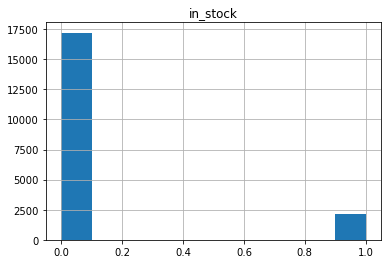

In [83]:
products.hist()

<p> <strong> 7.Some insights.  </strong>  </p>

<h> <strong> BRANDS DATAFRAME <strong>  </h> 

In [87]:
import pandas as pd

brands = pd.read_csv("brands.csv")
print(brands)

    short       long
0     8MO  8Mobility
1     ACM       Acme
2     ADN     Adonit
3     AII      Aiino
4     AKI     Akitio
..    ...        ...
182   XOO     Xoopar
183   XRI     X-Rite
184   XTO      Xtorm
185   ZAG   ZaggKeys
186   ZEP       Zepp

[187 rows x 2 columns]


<p> <strong> 1. Initial exploration  </strong>  </p>

In [88]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


<p> <strong> 2. Visualize first five and last five rows </strong>  </p>

In [89]:
brands.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [90]:
brands.tail()

,short,long
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys
186,ZEP,Zepp


In [99]:
brands.duplicated().sum()

0

<p> <strong> 3.Some basic numerical aggregations </strong>  </p>

In [92]:
brands.describe()

,short,long
count,187,187
unique,187,181
top,FCM,Jaybird
freq,1,2


<p> <strong> 4.Highlight which columns contain missing data  </strong>  </p>

In [93]:
brands.shape

(187, 2)

In [94]:
brands.isna().any()

short    False
long     False
dtype: bool

In [95]:
brands.columns

Index(['short', 'long'], dtype='object')

<p> <strong> 5.Some insights.  </strong>  </p>

<p> DF useful to merge with other dataframes in order to see for each sku the name of the product </p>